In [60]:
%load_ext autoreload
%autoreload 2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from backtest import backtest  
from SentimentFactorD import SentimentFactorD as sf

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [62]:
# Return df of results with changeing length_1 and stock type
# Debug
def get_results(w = True, r = True, len2 = 12):
    print('Weighted = ' + str(w) +'; rolling = ' + str(r) + '; len_r = ' + str(len2))
    test_list = ['szzs','szcz','cybz','hssb','zzwb']
    cols = list(range(1,7))
    cum_lists = []
    sp_lists = []
    for i in range(7):
        if i == 0:
            positions = fack_positions
        else:
            positions = sf(length_1 = i, weighted = w, rolling = r, length_2 = len2).get_sentiment_factor()
            if len(positions.position.unique())== 1:
                print('Warnning: When len_1 = ' + str(i) + ', there is only '+ str(positions.position.unique()) + ' in positions.') 
        list_cum = []
        list_sp = []
        for j in test_list:
            backtester = backtest(positions, index=j)  #szzs/szcz/cybz
            # day-to-day pnl, cumsum pnl
            dtd_pnl, cum_pnl = backtester.get_pnl()
            cum = cum_pnl.iloc[-1].cum_pnl
            # sharpe ratio
            sr_1d = backtester.get_sharpe_ratio_1d()
            sr_1y = backtester.get_sharpe_ratio_1y()

            list_cum.append(cum)
            list_sp.append(sr_1y)
        cum_lists.append(list_cum)
        sp_lists.append(list_sp)
    df_cum = pd.DataFrame(np.array(cum_lists), columns=test_list)
    df_sp = pd.DataFrame(np.array(sp_lists), columns=test_list)
    return df_cum, df_sp

           

In [ ]:
get_results(w = True, r = True, len2 = 12)

In [63]:
def get_all_result(index):
    w = [True, False]
    r = [True, False]
    list_results = []
    positions = fack_positions
    backtester = backtest(positions, index = index)
    # day-to-day pnl, cumsum pnl
    dtd_pnl, cum_pnl = backtester.get_pnl()
    cum = cum_pnl.iloc[-1].cum_pnl
    # sharpe ratio
    sr_pd = backtester.get_sharpe_ratio_period()
    sr_1y = backtester.get_sharpe_ratio_1y()
    result = [index, cum, sr_1y, False, 0, False, 0]
    list_results.append(result)
    for i in w:
        for j in r:
            if j == True:
                for p in range(1,7):  
                    for q in range(2,31):
                        positions = sf(length_1 = p, weighted = i, rolling = j, length_2 = q).get_sentiment_factor()
                        # print(positions)
                        backtester = backtest(positions, index = index)
                        # day-to-day pnl, cumsum pnl
                        dtd_pnl, cum_pnl = backtester.get_pnl()
                        cum = cum_pnl.iloc[-1].cum_pnl
                        # sharpe ratio
                        sr_pd = backtester.get_sharpe_ratio_period()
                        sr_1y = backtester.get_sharpe_ratio_1y()
                        result = [index, cum, sr_1y, i, p, j, q]
                        # print(result)
                        list_results.append(result)
            else:
                for p in range(1,7):
                    positions = sf(length_1 = p, weighted = i, rolling = j, length_2 = 12).get_sentiment_factor()
                    backtester = backtest(positions, index = index)
                    # day-to-day pnl, cumsum pnl
                    dtd_pnl, cum_pnl = backtester.get_pnl()
                    cum = cum_pnl.iloc[-1].cum_pnl
                    # sharpe ratio
                    sr_pd = backtester.get_sharpe_ratio_period()
                    sr_1y = backtester.get_sharpe_ratio_1y()
                    result = [index, cum, sr_1y, i, p, j, 0]
                    list_results.append(result)
    results_df = pd.DataFrame(np.array(list_results), columns=['index','cum_pnl','sp_1y','weighted','len_1','rolling','len_2'])
    return results_df


In [64]:
test_list = ['szzs','szcz','cybz','hssb','zzwb']
results = pd.DataFrame()
for t in test_list:
    df = get_all_result(t)
    results = pd.concat([results, df], ignore_index=True)

In [66]:
results.head(60)

,index,cum_pnl,sp_1y,weighted,len_1,rolling,len_2
0,szzs,174182.05265820003,nan,False,0,False,0
1,szzs,0.0,nan,True,1,True,2
2,szzs,-231489.27699129935,-7.532819427987989,True,1,True,3
3,szzs,-47604.288373398944,-1.5390499355093599,True,1,True,4
4,szzs,-151664.36502669938,-7.154321733529019,True,1,True,5
5,szzs,-120420.17408869928,-5.613651887430658,True,1,True,6
6,szzs,20498.961398200947,0.20346070558589696,True,1,True,7
7,szzs,128950.7455821007,3.5863129046817748,True,1,True,8
8,szzs,85028.4213219008,2.6016551687176213,True,1,True,9
9,szzs,-103269.0123701992,-4.865089445363652,True,1,True,10


In [67]:
results.to_csv('/home/afan/emotion_analysis/data/processed_data/results_v3.csv', index=False)

In [68]:
results.to_excel('/home/afan/emotion_analysis/data/processed_data/results_v3.xlsx',index=False)

In [62]:
df_cum, df_sp = get_results(w = True, r = True, len2 = 12)
positions = 

print('cum_pnl')
print(df_cum)
cm = df_cum.max()
print(cm)
print()
print('sp')
print(df_sp)
sm = df_sp.max()
print(sm)

# szzs    311038.451040
# szcz    567996.526657
# cybz    752543.900364

# szzs    254676.686812
# szcz    423968.092190
# cybz    486873.396335   

# szzs,311038.4510402011,2.1434843081914376,True,2,True,12

Weighted = True; rolling = True; len_r = 12
cum_pnl
            szzs           szcz           cybz
0  177707.056816  334362.717751  486873.396335
1  280143.830507  494159.569245  575814.744348
2  311038.451040  567996.526657  752543.900364
3 -997480.533126 -990707.183856 -999544.838920
4  109245.893511  186408.867973  241025.958642
5  106771.495101  182215.037358  238571.953113
6  106771.495101  182215.037358  238571.953113
szzs    311038.451040
szcz    567996.526657
cybz    752543.900364
dtype: float64

sp
       szzs      szcz      cybz
0  1.524762  2.135278  2.613076
1  1.955158  2.452902  2.503262
2  2.143484  2.708619  3.022743
3 -1.449138 -1.449138 -1.449138
4  1.446903  2.142962  2.380078
5  1.418304  2.115381  2.359298
6  1.418304  2.115381  2.359298
szzs    2.143484
szcz    2.708619
cybz    3.022743
dtype: float64


In [38]:
p = sf(length_1 = 2, weighted = True, rolling = True, length_2 = 12).get_sentiment_factor()
backtester = backtest(positions, index = index)
                        # day-to-day pnl, cumsum pnl
                        dtd_pnl, cum_pnl = backtester.get_pnl()
                        cum = cum_pnl.iloc[-1].cum_pnl
p.head(60)

IndentationError: unexpected indent (<ipython-input-38-09259414e6df>, line 4)

In [63]:
positions

,position
date,
2020-02-03,1
2020-02-04,1
2020-02-05,1
2020-02-06,1
2020-02-07,1
...,...
2020-07-21,1
2020-07-22,1
2020-07-23,1


In [97]:
df_cum, df_sp = get_results(w = True, r = True, len2 = 2)

print('cum_pnl')
print(df_cum)
cm = df_cum.max()
print(cm)
print()
print('sp')
print(df_sp)
sm = df_sp.max()
print(sm)

Weighted = True; rolling = True; len_r = 2
Warnning: There is only [1] in positions.
Warnning: There is only [1] in positions.
Warnning: There is only [1] in positions.
Warnning: There is only [1] in positions.
Warnning: There is only [1] in positions.
Warnning: There is only [1] in positions.
Warnning: There is only [1] in positions.
Warnning: There is only [1] in positions.
Warnning: There is only [1] in positions.
cum_pnl
            szzs           szcz           cybz
0  177707.056816  334362.717751  486873.396335
1  177707.056816  334362.717751  486873.396335
2  177707.056816  334362.717751  486873.396335
3 -304177.177277 -180100.441897  -58219.313825
4 -306388.222908 -237081.247382 -146302.961293
5 -414592.798787 -377681.535012 -300888.725492
6 -362178.144867 -303799.346151 -205540.105780
szzs    177707.056816
szcz    334362.717751
cybz    486873.396335
dtype: float64

sp
       szzs      szcz      cybz
0  1.524762  2.135278  2.613076
1  1.524762  2.135278  2.613076
2  1.524762  2

In [107]:
get_results(w = False, r = True, len2 = 12)

(            szzs           szcz           cybz
 0  177707.056816  334362.717751  486873.396335
 1  239363.628434  424720.468780  505499.570651
 2  311038.451040  567996.526657  752543.900364
 3 -997480.533126 -990707.183856 -999544.838920
 4  106771.495101  182215.037358  238571.953113
 5   99659.811157  168532.794616  226639.835437
 6   99659.811157  168532.794616  226639.835437,
        szzs      szcz      cybz
 0  1.524762  2.135278  2.613076
 1  1.855527  2.439286  2.572984
 2  2.143484  2.708619  3.022743
 3 -1.449138 -1.449138 -1.449138
 4  1.418304  2.115381  2.359298
 5  1.333924  1.980052  2.262311
 6  1.333924  1.980052  2.262311)

# To see details

In [92]:
#positions = sf(length_1 = 3, weighted = False, rolling = True, length_2 = 15).get_sentiment_factor()
positions= fack_positions
# Create backtest class, index to be changed with different index
backtester = backtest(positions, index='zzwb')  #szzs/szcz/cybz/hssb/zzwb

# Get data and result from backtest class

# index data
index_data = backtester.get_index_data()

# close price
_, open_price = backtester.get_prices()

# price return
# price_return = backtester.get_price_return()

# day-to-day pnl, cumsum pnl
dtd_pnl, cum_pnl = backtester.get_pnl()

# day-tp-day return,cum return
dtd_ret, cum_ret = backtester.get_return()

# sharpe ratio
sr_pd = backtester.get_sharpe_ratio_period()
sr_1y = backtester.get_sharpe_ratio_1y()

#details
net_df, tot_df ,amount_df, cum_amount_df = backtester.get_net_amount()


print(str(cum_pnl.iloc[-1].cum_pnl)+'; '+str(sr_1y))


278941.3986800001; nan


In [94]:
amount_df

,amount_t
date,
2020-02-03,203
2020-02-04,0
2020-02-05,0
2020-02-06,0
2020-02-07,0
...,...
2020-07-21,0
2020-07-22,0
2020-07-23,0


In [74]:
positions.tail(60)

,position
date,
2020-04-28,0
2020-04-29,0
2020-04-30,0
2020-05-06,0
2020-05-07,0
2020-05-08,0
2020-05-11,0
2020-05-12,0
2020-05-13,-1


In [78]:
tot_df.tail(60)

,tot_t
date,
2020-04-28,1.130776e+06
2020-04-29,1.116990e+06
2020-04-30,1.129261e+06
2020-05-06,1.142077e+06
2020-05-07,1.170605e+06
2020-05-08,1.175018e+06
2020-05-11,1.186625e+06
2020-05-12,1.179127e+06
2020-05-13,1.172495e+06


In [87]:
(0.997*6304.59*224-5341.11*224)+1.198324e+06

1409906.8355200002

In [95]:
0.997*6304.59*203-1.003*203*4896.89

278941.3986800001

In [90]:
open_price
# 0.997*6304.59*203-1.003*203*4896.89

,open_price
date,
2020-02-03,4896.89
2020-02-04,4736.12
2020-02-05,5035.41
2020-02-06,5128.19
2020-02-07,5287.27
...,...
2020-07-21,6546.57
2020-07-22,6554.17
2020-07-23,6562.05


In [77]:
amount_df.tail(60)

,amount_t
date,
2020-04-28,0
2020-04-29,0
2020-04-30,0
2020-05-06,0
2020-05-07,0
2020-05-08,0
2020-05-11,0
2020-05-12,0
2020-05-13,212


In [88]:
amount = amount_df[amount_df.amount_t!=0]
if amount_df.amount_t[-1] == 0:
    tot = tot_df.loc[list(amount.index)+[pd.to_datetime('2020-7-27')]]
else:
    tot = tot_df.loc[list(amount.index)]
tot

,tot_t
date,
2020-02-17,9.970219e+05
2020-03-11,1.034186e+06
2020-04-07,1.116742e+06
2020-05-13,1.172495e+06
2020-05-26,1.198324e+06
2020-07-27,1.409907e+06


In [48]:
tot.diff()/tot.shift(1)

,tot_t
date,
2020-02-04,NaN
2020-02-10,-0.066086
2020-04-17,-0.016327
2020-04-20,-0.006478
2020-04-23,-0.004277
2020-04-27,0.005348
2020-05-07,0.027706
2020-05-25,0.021596
2020-06-04,0.038010


In [114]:
positions

,position
date,
2020-02-03,1
2020-02-04,1
2020-02-05,1
2020-02-06,1
2020-02-07,1
...,...
2020-07-21,1
2020-07-22,1
2020-07-23,1


In [100]:
positions.head(60)

,position
date,
2020-02-03,0
2020-02-04,0
2020-02-05,0
2020-02-06,0
2020-02-07,0
2020-02-10,0
2020-02-11,0
2020-02-12,0
2020-02-13,0


In [115]:
cum_amount_df.head(60)

,cum_amount_t
date,
2020-02-03,563
2020-02-04,563
2020-02-05,563
2020-02-06,563
2020-02-07,563
2020-02-10,563
2020-02-11,563
2020-02-12,563
2020-02-13,563


In [69]:
9.911901e+05-1.000000e+06

-8809.900000000023

In [117]:
tot_df
#t1 = 997010.3344798

,tot_t
date,
2020-02-03,9.970119e+05
2020-02-04,1.006581e+06
2020-02-05,1.075725e+06
2020-02-06,1.090366e+06
2020-02-07,1.134943e+06
...,...
2020-07-21,1.525652e+06
2020-07-22,1.535402e+06
2020-07-23,1.543826e+06


In [60]:
9.911901e+05-1000000


-8809.900000000023

In [92]:
cum_pnl.head(60)


,cum_pnl
date,
2020-02-03,0.000000
2020-02-04,0.000000
2020-02-05,0.000000
2020-02-06,0.000000
2020-02-07,0.000000
2020-02-10,0.000000
2020-02-11,0.000000
2020-02-12,0.000000
2020-02-13,0.000000


In [94]:
c = 1000000
a1 = int(c/(1.003*2089.2142))
print(9.970103e+05-c)
# fee = -2989.665520
# a1 = 477 right
# ca1 = 477
print(0.003*a1*2089.2142)
net1 = c - a1*2089.2142*1.003
tot1 = c - a1*2089.2142*0.003
print(tot1)
# tot1 = 9.970103e+05
# net1 = 455.16107980010565
net21 = net1+2083.1965*a1*0.997
# net21 = 991158.8373883002
a2 = int(net21/(1.006*2083.1965))
print(a2)

tot2 = tot1 -a1*2089.2142+2083.1965*a1*0.997 -a2*0.003*2083.1965
# tot2 = 	9.882090e+05
cp = tot2 -c
print(tot2)
#- a2*0.003*2083.1965
# cp = -11790.968856
print(cp)
net2 = net21 - a2*1.006*2083.1965
# net2 = 1990.476900
print(net2)


-2989.6999999999534
2989.6655202
997010.3344798
472
988209.0311443001
-11790.968855699874
1990.4769003002439


In [102]:
net31 = net2+a2*(2083.1965*2.003-1944.9638*1.003)
a3 = int(net31/(1.003*1944.9638))
print(a3)
net3 = net31 - a3*1944.9638*1.003
print(net3)
tot3 = tot2 + a2*(2083.1965-1.003*1944.9638) -a3*0.003*1944.9638
print(tot3)
# 1.047562e+06

538
1171.100830300711
1047561.6252303002


In [109]:
open_price#2089.2142(1) 2083.1965(-1) 1944.9638(1) 2053.1243(-1) 2070.1395(1) 2639.2556(end)
# 1769.1641

,open_price
date,
2020-02-03,1769.1641
2020-02-04,1786.1600
2020-02-05,1908.9740
2020-02-06,1934.9801
2020-02-07,2014.1570
...,...
2020-07-21,2708.1348
2020-07-22,2725.4529
2020-07-23,2740.4140


In [76]:
net_df.head(60)

,net_t
date,
2020-02-03,1000000.000000
2020-02-04,1000000.000000
2020-02-05,1000000.000000
2020-02-06,1000000.000000
2020-02-07,1000000.000000
2020-02-10,1000000.000000
2020-02-11,1000000.000000
2020-02-12,1000000.000000
2020-02-13,1000000.000000


In [11]:
dtd_ret

,dtd_ret
date,
2020-02-03,0.0
2020-02-04,0.0
2020-02-05,0.0
2020-02-06,0.0
2020-02-07,0.0
...,...
2020-07-21,0.0
2020-07-22,0.0
2020-07-23,0.0


In [4]:
# 多头
ps = []
for i in range(len(positions)):
    ps.append(1)
fack_positions = pd.DataFrame(ps, index=positions.index, columns=['position'])
fack_positions

,position
date,
2020-02-03,1
2020-02-04,1
2020-02-05,1
2020-02-06,1
2020-02-07,1
...,...
2020-07-21,1
2020-07-22,1
2020-07-23,1


In [ ]:
# Trading with close price:
# szcz_cp:
# r = T
# w = F; l1 =2; l2 = 5
36033.44193180103; 0.3934457819532221
# w = T; l1 =2; l2 = 5
216826.175133802; 1.408583528798022

# w = F; l1 =2; l2 = 10
246240.26775600086; 1.6859333573951834
# w = T; l1 =2; l2 = 10
292528.4823258009; 1.9344228438985382

# w = F; l1 =2; l2 = 12
471958.23073030217; 2.589502706608895
# w = T; l1 =2; l2 = 12
471958.23073030217; 2.589502706608895
# (same ??)

# w = F; l1 =2; l2 >= 13 
-992219.6942151999; -1.4491376746189415
# w = T; l1 =2; l2 >= 13
-992219.6942151999; -1.4491376746189415
# (same ??)


# Trading with open price

# w = T; l1 =2; l2 = 12
567996.5266565015; 2.7086189915554053




In [52]:
# -992219.6942151999; -1.4491376746189415

In [85]:
positions.groupby(['position'])['position'].count() # rolling len = 12; w =F

position
-1     8
 0    95
 1    17
Name: position, dtype: int64

In [87]:
positions.groupby(['position'])['position'].count() # rolling len = 12; w = T

position
-1     8
 0    95
 1    17
Name: position, dtype: int64

In [59]:
positions.groupby(['position'])['position'].count() # rolling len = 12; w = T

position
-1     7
 0    94
 1    19
Name: position, dtype: int64

In [64]:
positions.groupby(['position'])['position'].count() # rolling+ len = 2

position
-1    10
 0    92
 1    18
Name: position, dtype: int64

In [ ]:
The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
456028.6126690034; 1.6955261478719357

In [43]:
dtd_pnl

,dtd_pnl
date,
2020-01-06,-2990.752807
2020-01-07,8769.086805
2020-01-08,-16203.411900
2020-01-09,26785.233000
2020-01-10,-4751.228700
...,...
2020-07-21,19448.755200
2020-07-22,16128.035200
2020-07-23,2769.617660


In [ ]:
# Result of ver4 (Do nothing at 0, abs ret)
166610.9279123065; 0.9202823578321697

404823.2932796057; 1.600459375257315

456028.6126690034; 1.5524553608827896

In [ ]:
# Result of ver3(len = 2)
-19539.394074493437; -0.1249777207207516

106892.47325610556; 0.513208584117643

161347.06834250432; 0.6984294368786818


In [ ]:
# Result of ver2(len = 2)
# 000001:
# 24.312970600000924; 0.07723896646355738

# 399001:
# 1667.6340237999889; 1.1273307081380504

# 399006:
# 460.80813629999784; 1.4898141021862776

In [186]:
# Result of ver 1
# # cum_pnl; sharp_ratio
# 706.9133; 2.1742212952605753 # a len = 1  
# 688.4069; 2.116285754876911  # a len = 2
# 402.5491; 1.2515517216932084 # a len =3
# 201.2112; 0.6344280664138905 # a len =4
# 497.9822; 1.645873659096398  # a len =5
# 757.8500; 2.514015783903533  # a len =6  *

# 178.3073; 0.45200018399206143 # b len = 1  *
# 121.8185; 0.3087366361154203  # b len = 2,3,4,5,6

# 555.5009999999993; 1.7476186543833816  # c len = 1
# 791.2576000000008; 2.5022840487906577  # c len = 2  *
# 615.4117999999994; 2.022053316418236   # c len =3
# 477.63859999999977; 1.7118397116649453 # c len = 4
# 315.58699999999953; 1.01727803277677   # c len = 5
# 435.62619999999924; 1.5386945338903537 # c len =6

# # szzh

1.7118397116649453

In [2]:
net = []
net.append(1000000)
net

[1000000]

In [9]:
positions

,position
date,
2020-01-06,1
2020-01-07,-1
2020-01-08,-1
2020-01-09,-1
2020-01-10,-1
...,...
2020-07-21,0
2020-07-22,-1
2020-07-23,-1


# Ver2: Backtest with 3‰ fee

In [142]:
def get_return(index_df, positions):
    # net_return = return - 0.003 open_price
    test_price = index_df.loc[positions.index,:]
    price_return = test_price.diff(1)
    price_return.columns = ['return']
    net_return = pd.DataFrame(
        price_return[['return']].values-test_price[['open_price']].values*0.003,
        index = price_return.index, columns=['net_return']
    )

    return price_return, net_return


def get_index_df(index):
    # read szzs from file
    path = str(index)+'.csv'
    szzs_df = pd.read_csv(str(index)+'.csv', usecols=[0, 6], names=['date', 'open_price']).iloc[1:,:]
    szzs_df['date'] = pd.to_datetime(szzs_df['date'])
    szzs_df['open_price'] = szzs_df['open_price'].astype('float')
    szzs_df = szzs_df.set_index('date')
    szzs_df = szzs_df.sort_index(ascending=True)

    return szzs_df


def get_zs_df(index, positions):
    op_df = get_index_df(index)
    rt_df, nr_df = get_return(op_df, positions)
    zs_df = pd.merge(op_df, rt_df, left_index=True, right_index=True)
    zs_df = pd.merge(zs_df, nr_df, left_index=True, right_index=True)
    zs_df = pd.merge(zs_df, positions, left_index=True, right_index=True)
    
    return zs_df



In [143]:
df = get_zs_df('000001', positions)
df.to_csv('/home/afan/emotion_analysis/data/processed_data/szzs_ps.csv', index=False)

In [144]:
def get_check_df (zs_df):
    check_df = zs_df
    check_list = []
    for i in range(len(check_df)-1):
        row1 = check_df.iloc[i]
        row2 = check_df.iloc[i+1]
        n = row2.net_return
        p = row1.position
        if p*n >= 0:
            check_list.append(1)
        else:
            check_list.append(0)
    check_list.append(np.nan)
    check_df['check'] = check_list
    
    return check_df

In [145]:
def get_pic(index):
    a = get_zs_df(index, positions)
    ck = get_check_df(a)

    c_0 = ck[ck.position==0]
    c_1 = ck[ck.position==1]
    c_1_r = c_1[c_1.check == 1]
    c_1_w = c_1[c_1.check == 0]
    c_2 = ck[ck.position==-1]
    c_2_r = c_2[c_2.check == 1]
    c_2_w = c_2[c_2.check == 0]

    plt.figure(figsize=(8, 8))
    plt.plot(ck.index, ck.open_price)
    plt.xlabel(u'Date')
    plt.ylabel(u'Open_price')
    plt.title(str(index))
    plt.scatter(c_1_r.index, c_1_r.open_price, marker='o', c='g', label="Right_Buy")
    plt.scatter(c_1_w.index, c_1_w.open_price, marker='o', c='r', label = 'Wrong_Buy')
    plt.scatter(c_2_r.index, c_2_r.open_price, marker='s', c='g', label = 'Right_Sell')
    plt.scatter(c_2_w.index, c_2_w.open_price, marker='s', c='r', label = 'Wrong_Sell')
    plt.scatter(c_0.index, c_0.open_price, marker='x', label = 'No_Action')
    plt.legend(loc = "upper left")

    plt.show()

In [32]:
def get_precision_rate(index, positions):
    zs_df = get_zs_df(index, positions)
    ck = get_check_df(zs_df)
    n = len(ck)-1
    rate_df = pd.DataFrame(ck.groupby(['position'])['check'].sum()/ck.groupby(['position'])['check'].count())
    count_df = pd.DataFrame(ck.groupby(['position'])['check'].count()/n)
    pc_df = pd.merge(rate_df, count_df, left_index=True, right_index=True)
    pc_df.columns=['group_accuracy','percentage_size']

    return  pc_df

# Result of ver1.0 (weighted)

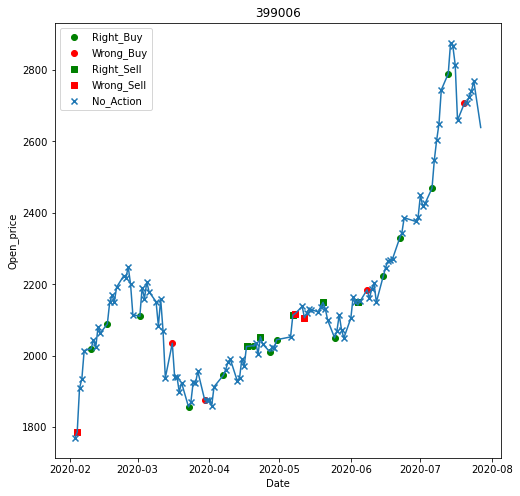

In [146]:
get_pic(399006)

In [37]:
get_precision_rate('399006',positions)

,group_accuracy,percentage_size
position,,
-1,0.3750,0.067227
0,1.0000,0.798319
1,0.6875,0.134454


399001.csv


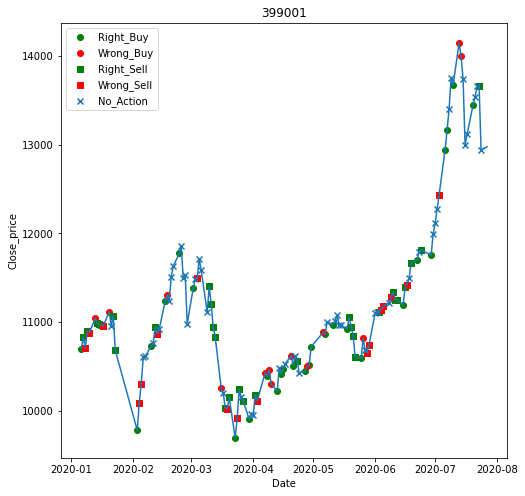

In [111]:
get_pic(399001)

In [112]:
get_precision_rate('399001',positions)

399001.csv


,group_accuracy,percentage_size
position,,
-1,0.638298,0.353383
0,1.000000,0.345865
1,0.675000,0.300752


000001.csv


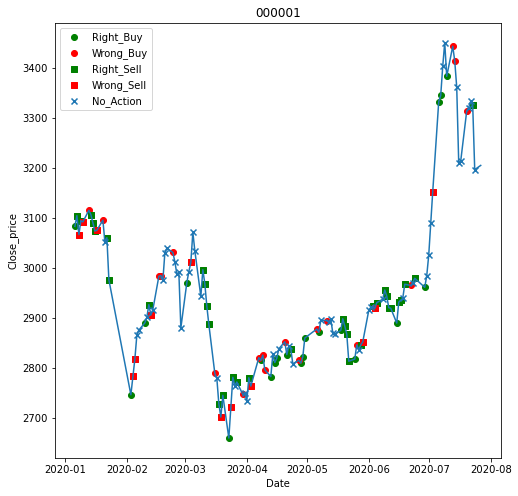

In [114]:
get_pic('000001')

In [115]:
get_precision_rate('000001',positions)

000001.csv


,group_accuracy,percentage_size
position,,
-1,0.723404,0.353383
0,1.000000,0.345865
1,0.525000,0.300752
